<a href="https://colab.research.google.com/github/Prashant-1008/Cyber_Believers/blob/main/predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complaint Classification Using Machine Learning

This notebook demonstrates how to classify user complaints into categories and sub-categories using trained machine learning models. It includes steps to:

- Accept a complaint as input
- Transform the input using a TF-IDF vectorizer
- Predict the category and sub-category using pre-trained models


## Dependencies and Imports
Ensure you have the required libraries installed before running this notebook.

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/train.csv")

In [5]:
df1 = pd.read_csv('/content/test.csv')

In [6]:
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


# Training the Dataset

In [7]:
df.isnull().sum()

,0
category,0
sub_category,6591
crimeaditionalinfo,21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [9]:
df.dropna(inplace = True)

In [10]:
df.duplicated().sum()

5056

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [14]:
df['category'].unique()

array(['Online and Social Media Related Crime', 'Online Financial Fraud',
       'Online Gambling  Betting', 'Any Other Cyber Crime',
       'Cyber Attack/ Dependent Crimes', 'Cryptocurrency Crime',
       'Hacking  Damage to computercomputer system etc',
       'Cyber Terrorism', 'Online Cyber Trafficking', 'Ransomware',
       'Report Unlawful Content'], dtype=object)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category'>

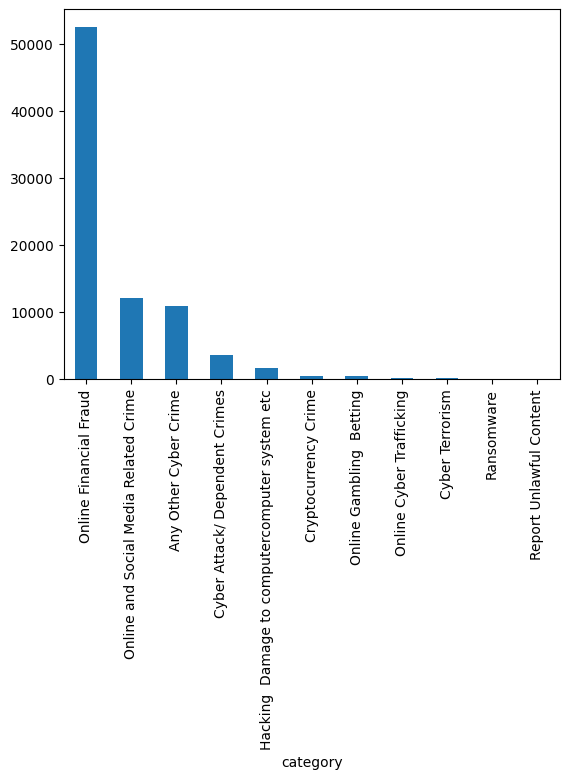

In [16]:
df['category'].value_counts().plot(kind = 'bar')

In [17]:
df['category'].value_counts()

,count
category,
Online Financial Fraud,52496
Online and Social Media Related Crime,12076
Any Other Cyber Crime,10811
Cyber Attack/ Dependent Crimes,3608
Hacking Damage to computercomputer system etc,1709
Cryptocurrency Crime,473
Online Gambling Betting,444
Online Cyber Trafficking,183
Cyber Terrorism,161


In [18]:
df['sub_category'].unique()

array(['Cyber Bullying  Stalking  Sexting', 'Fraud CallVishing',
       'Online Gambling  Betting', 'Online Job Fraud',
       'UPI Related Frauds', 'Internet Banking Related Fraud', 'Other',
       'Profile Hacking Identity Theft',
       'DebitCredit Card FraudSim Swap Fraud', 'EWallet Related Fraud',
       'Data Breach/Theft', 'Cheating by Impersonation',
       'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
       'FakeImpersonating Profile', 'Cryptocurrency Fraud',
       'Malware Attack', 'Business Email CompromiseEmail Takeover',
       'Email Hacking', 'Hacking/Defacement',
       'Unauthorised AccessData Breach', 'SQL Injection',
       'Provocative Speech for unlawful acts', 'Ransomware Attack',
       'Cyber Terrorism', 'Tampering with computer source documents',
       'DematDepository Fraud', 'Online Trafficking',
       'Online Matrimonial Fraud', 'Website DefacementHacking',
       'Damage to computer computer systems etc', 'Impersonating Email'

In [19]:
df['sub_category'].value_counts()

,count
sub_category,
UPI Related Frauds,23526
Other,10811
DebitCredit Card FraudSim Swap Fraud,10044
Internet Banking Related Fraud,8096
Fraud CallVishing,5780
Cyber Bullying Stalking Sexting,4051
EWallet Related Fraud,4008
FakeImpersonating Profile,2289
Profile Hacking Identity Theft,2070


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Splitting into category and sub-category
X = df['crimeaditionalinfo']
y_category = df['category']
y_sub_category = df['sub_category']

# Splitting the data for category classification
X_train, X_test, y_train_category, y_test_category = train_test_split(X, y_category, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [22]:
# Logistic Regression Model for Category Classification
category_model = LogisticRegression()
category_model.fit(X_train_tfidf, y_train_category)

# Prediction and evaluation
y_pred_category = category_model.predict(X_test_tfidf)
print("Category Classification Report:")
print(classification_report(y_test_category, y_pred_category))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Category Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                precision    recall  f1-score   support

                         Any Other Cyber Crime       0.50      0.26      0.34      2167
                          Cryptocurrency Crime       0.64      0.26      0.37       104
                Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       747
                               Cyber Terrorism       0.00      0.00      0.00        31
Hacking  Damage to computercomputer system etc       0.52      0.28      0.37       323
                      Online Cyber Trafficking       0.00      0.00      0.00        41
                        Online Financial Fraud       0.81      0.94      0.87     10510
                      Online Gambling  Betting       0.67      0.02      0.04        89
         Online and Social Media Related Crime       0.68      0.63      0.65      2377
                                    Ransomware       0.00      0.00      0.00        15

                              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Splitting the data for sub-category classification
X_train, X_test, y_train_sub_category, y_test_sub_category = train_test_split(X, y_sub_category, test_size=0.2, random_state=42)

# Logistic Regression Model for Sub-Category Classification
sub_category_model = LogisticRegression()
sub_category_model.fit(X_train_tfidf, y_train_sub_category)

# Prediction and evaluation
y_pred_sub_category = sub_category_model.predict(X_test_tfidf)
print("Sub-Category Classification Report:")
print(classification_report(y_test_sub_category, y_pred_sub_category))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sub-Category Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                      precision    recall  f1-score   support

                             Business Email CompromiseEmail Takeover       0.00      0.00      0.00        63
                                           Cheating by Impersonation       0.36      0.02      0.04       406
                                                Cryptocurrency Fraud       0.66      0.40      0.50       104
                                   Cyber Bullying  Stalking  Sexting       0.59      0.65      0.62       786
                                                     Cyber Terrorism       0.00      0.00      0.00        31
                             Damage to computer computer systems etc       0.00      0.00      0.00        18
                                                   Data Breach/Theft       0.17      0.19      0.18        85
                                DebitCredit Card FraudSim Swap Fraud       0.73      0.67      0.70      2013
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Predicting category and sub-category for a new statement
new_statement = input("Enter your complaint : ")
new_statement_tfidf = tfidf.transform([new_statement])  # Wrap in a list

predicted_category = category_model.predict(new_statement_tfidf)
predicted_sub_category = sub_category_model.predict(new_statement_tfidf)

print(f'Predicted Category: {predicted_category[0]}')
print(f'Predicted Sub-Category: {predicted_sub_category[0]}')


Enter your complaint : i am from delhi saket, i was receiving an email of lottery and was asking for my bank details now he is not responding after taking 2 lakh as security
Predicted Category: Online Financial Fraud
Predicted Sub-Category: Fraud CallVishing
